In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


In [4]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

In [5]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 8s - loss: 0.5381 - accuracy: 0.7896 - binary_crossentropy: 0.5381 - val_loss: 0.3777 - val_accuracy: 0.8673 - val_binary_crossentropy: 0.3777
Epoch 2/20
25000/25000 - 6s - loss: 0.2802 - accuracy: 0.9015 - binary_crossentropy: 0.2802 - val_loss: 0.2897 - val_accuracy: 0.8862 - val_binary_crossentropy: 0.2897
Epoch 3/20
25000/25000 - 4s - loss: 0.2007 - accuracy: 0.9284 - binary_crossentropy: 0.2007 - val_loss: 0.2826 - val_accuracy: 0.8868 - val_binary_crossentropy: 0.2826
Epoch 4/20
25000/25000 - 4s - loss: 0.1621 - accuracy: 0.9432 - binary_crossentropy: 0.1621 - val_loss: 0.2982 - val_accuracy: 0.8826 - val_binary_crossentropy: 0.2982
Epoch 5/20
25000/25000 - 3s - loss: 0.1341 - accuracy: 0.9548 - binary_crossentropy: 0.1341 - val_loss: 0.3167 - val_accuracy: 0.8790 - val_binary_crossentropy: 0.3167
Epoch 6/20
25000/25000 - 3s - loss: 0.1136 - accuracy: 0.9636 - binary_crossentropy: 0.1136 - val_loss: 0.3436

In [7]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [8]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5560 - accuracy: 0.7827 - binary_crossentropy: 0.5560 - val_loss: 0.4435 - val_accuracy: 0.8478 - val_binary_crossentropy: 0.4435
Epoch 2/20
25000/25000 - 3s - loss: 0.3512 - accuracy: 0.8890 - binary_crossentropy: 0.3512 - val_loss: 0.3401 - val_accuracy: 0.8802 - val_binary_crossentropy: 0.3401
Epoch 3/20
25000/25000 - 3s - loss: 0.2648 - accuracy: 0.9142 - binary_crossentropy: 0.2648 - val_loss: 0.3042 - val_accuracy: 0.8840 - val_binary_crossentropy: 0.3042
Epoch 4/20
25000/25000 - 3s - loss: 0.2186 - accuracy: 0.9277 - binary_crossentropy: 0.2186 - val_loss: 0.2893 - val_accuracy: 0.8866 - val_binary_crossentropy: 0.2893
Epoch 5/20
25000/25000 - 3s - loss: 0.1878 - accuracy: 0.9382 - binary_crossentropy: 0.1878 - val_loss: 0.2849 - val_accuracy: 0.8863 - val_binary_crossentropy: 0.2849
Epoch 6/20
25000/25000 - 3s - loss: 0.1661 - accuracy: 0.9461 - binary_crossentropy: 0.1661 - val_loss: 0.2870

In [9]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [10]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 7s - loss: 0.3405 - accuracy: 0.8571 - binary_crossentropy: 0.3405 - val_loss: 0.2945 - val_accuracy: 0.8799 - val_binary_crossentropy: 0.2945
Epoch 2/20
25000/25000 - 6s - loss: 0.1424 - accuracy: 0.9480 - binary_crossentropy: 0.1424 - val_loss: 0.3316 - val_accuracy: 0.8731 - val_binary_crossentropy: 0.3316
Epoch 3/20
25000/25000 - 7s - loss: 0.0448 - accuracy: 0.9875 - binary_crossentropy: 0.0448 - val_loss: 0.4499 - val_accuracy: 0.8683 - val_binary_crossentropy: 0.4499
Epoch 4/20
25000/25000 - 7s - loss: 0.0063 - accuracy: 0.9990 - binary_crossentropy: 0.0063 - val_loss: 0.5975 - val_accuracy: 0.8675 - val_binary_crossentropy: 0.5975
Epoch 5/20
25000/25000 - 7s - loss: 8.5213e-04 - accuracy: 1.0000 - binary_crossentropy: 8.5213e-04 - val_loss: 0.6830 - val_accuracy: 0.8694 - val_binary_crossentropy: 0.6830
Epoch 6/20
25000/25000 - 6s - loss: 2.1401e-04 - accuracy: 1.0000 - binary_crossentropy: 2.1401e-04 - 

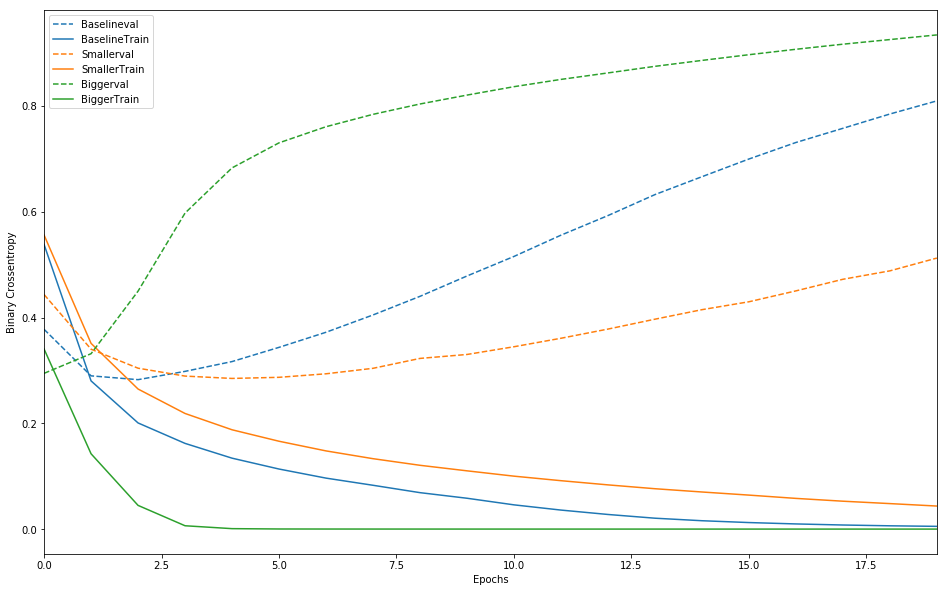

In [11]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16, 10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_' + key],
                       '--', label=name.title()+'val')
        plt.plot(history.epoch, history.history[key],
                 color=val[0].get_color(), label=name.title()+'Train')
    
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    
    plt.xlim([0, max(history.epoch)])

plot_history([('baseline', baseline_history),
            ('smaller', smaller_history),
             ('bigger', bigger_history)])
        
        

In [12]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                               epochs=20, batch_size=512,
                               validation_data=(test_data, test_labels),
                               verbose=2)



Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 7s - loss: 0.5068 - accuracy: 0.8097 - binary_crossentropy: 0.4681 - val_loss: 0.3644 - val_accuracy: 0.8784 - val_binary_crossentropy: 0.3232
Epoch 2/20
25000/25000 - 3s - loss: 0.2927 - accuracy: 0.9097 - binary_crossentropy: 0.2471 - val_loss: 0.3336 - val_accuracy: 0.8864 - val_binary_crossentropy: 0.2849
Epoch 3/20
25000/25000 - 3s - loss: 0.2448 - accuracy: 0.9312 - binary_crossentropy: 0.1937 - val_loss: 0.3383 - val_accuracy: 0.8856 - val_binary_crossentropy: 0.2856
Epoch 4/20
25000/25000 - 3s - loss: 0.2243 - accuracy: 0.9407 - binary_crossentropy: 0.1698 - val_loss: 0.3573 - val_accuracy: 0.8786 - val_binary_crossentropy: 0.3015
Epoch 5/20
25000/25000 - 3s - loss: 0.2092 - accuracy: 0.9483 - binary_crossentropy: 0.1524 - val_loss: 0.3680 - val_accuracy: 0.8764 - val_binary_crossentropy: 0.3103
Epoch 6/20
25000/25000 - 3s - loss: 0.1980 - accuracy: 0.9534 - binary_crossentropy: 0.1392 - val_loss: 0.3807

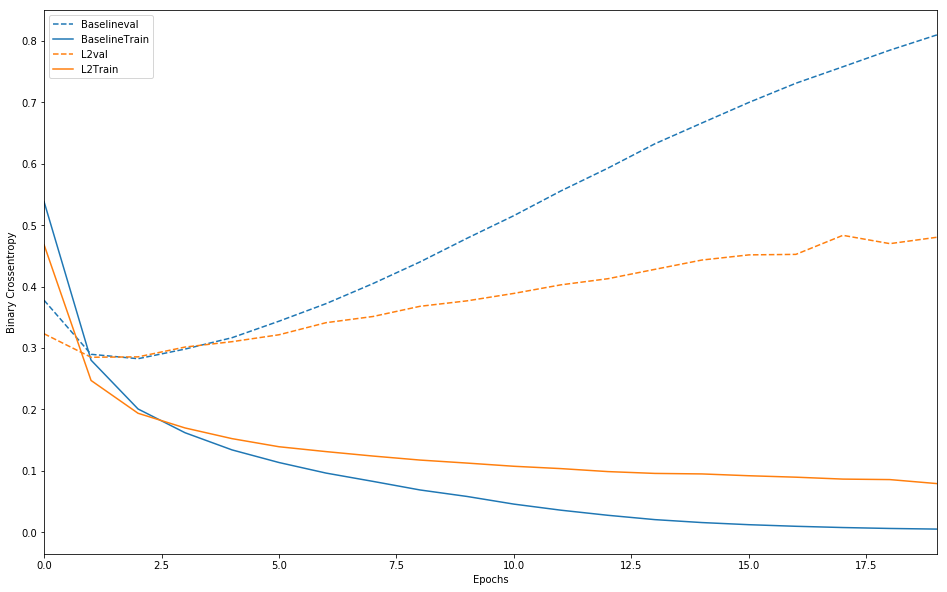

In [13]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [14]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6247 - accuracy: 0.6391 - binary_crossentropy: 0.6247 - val_loss: 0.4685 - val_accuracy: 0.8563 - val_binary_crossentropy: 0.4685
Epoch 2/20
25000/25000 - 3s - loss: 0.4415 - accuracy: 0.8157 - binary_crossentropy: 0.4415 - val_loss: 0.3310 - val_accuracy: 0.8824 - val_binary_crossentropy: 0.3310
Epoch 3/20
25000/25000 - 3s - loss: 0.3470 - accuracy: 0.8718 - binary_crossentropy: 0.3470 - val_loss: 0.2865 - val_accuracy: 0.8876 - val_binary_crossentropy: 0.2865
Epoch 4/20
25000/25000 - 3s - loss: 0.2867 - accuracy: 0.8983 - binary_crossentropy: 0.2867 - val_loss: 0.2772 - val_accuracy: 0.8862 - val_binary_crossentropy: 0.2772
Epoch 5/20
25000/25000 - 3s - loss: 0.2440 - accuracy: 0.9157 - binary_crossentropy: 0.2440 - val_loss: 0.2786 - val_accuracy: 0.8877 - val_binary_crossentropy: 0.2786
Epoch 6/20
25000/25000 - 3s - loss: 0.2115 - accuracy: 0.9281 - binary_crossentropy: 0.2115 - val_loss: 0.2911

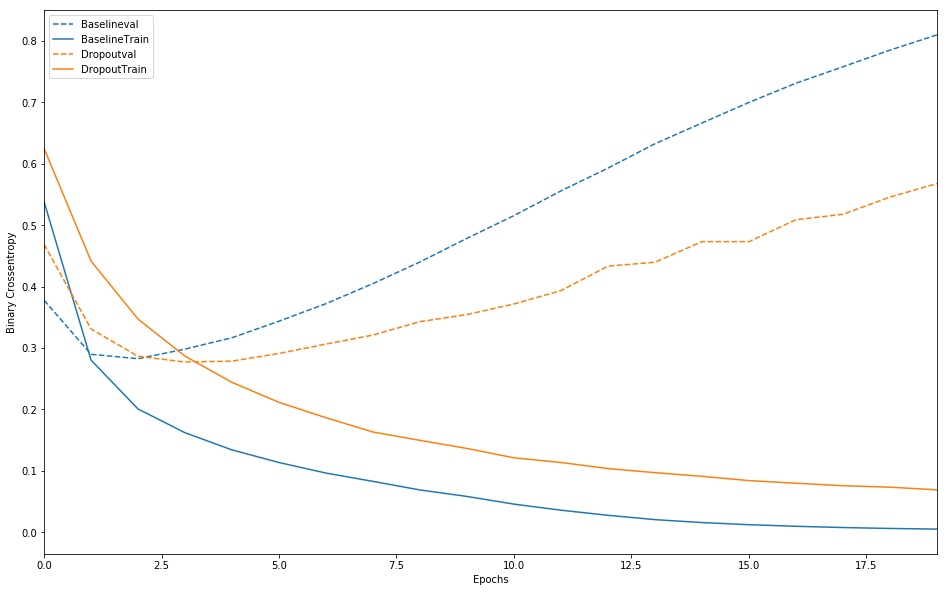

In [15]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])